In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import nltk  
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()
pd.reset_option('display.float_format')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [2]:
cd /Users/Chiragrakholiya/Downloads/Project2/

/Users/chiragrakholiya/Downloads/Project2


In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

data = pd.read_csv('hn2018_2019.csv', parse_dates=['Created At'], date_parser=dateparse)
data.head()

,Unnamed: 0,Object ID,Title,Post Type,Author,Created At,URL,Points,Number of Comments
0,2294635,16043786,Top Hacker News Books in 2017,story,0x54MUR41,2018-01-01 00:06:16,https://hackernewsbooks.com/year/2017,1,0.0
1,2294636,16043817,Beijing enjoys best winter air quality in five...,story,gpetukhov,2018-01-01 00:15:13,http://www.scmp.com/news/china/policies-politi...,2,0.0
2,2294637,16043825,Ask HN: Any domain name registrars that don't ...,ask_hn,glockenspielen,2018-01-01 00:16:54,NaN,1,2.0
3,2294638,16043845,Controversial Therapy Has Led to Death Threats...,story,cpncrunch,2018-01-01 00:23:05,https://www.buzzfeed.com/tomchivers/inside-the...,2,0.0
4,2294639,16043851,Ruby 3x3 – Ruby 3 Will Be 3 Times Faster – Wha...,story,geraldbauer,2018-01-01 00:25:05,https://planetruby.github.io/advent2017/ruby3x3,2,0.0


In [4]:
type(data['Created At'][0])
split_date=pd.datetime(2019,1,1)
df_train = data.loc[data['Created At'] < split_date]
df_test = data.loc[data['Created At'] >= split_date]

In [5]:
Training_data=df_train["Title"]
Training_targets=df_train["Post Type"]
Testing_data=df_test["Title"]
Testing_targets=df_test["Post Type"]

In [6]:
def data_preprocess(sentence):
    sentence=sentence.encode("ascii", errors="ignore").decode()
    sentence = sentence.lower()
    #tk = MWETokenizer([('ask', 'hn:'), ('show', 'hn:')])
    tokens = sentence.split()
    tokens=[i.strip('+-:?*_,$""~#%\'\|\!=') for i in tokens]
    lemma_words=[wordnet_lemmatizer.lemmatize(w) for w in tokens]
    return lemma_words

In [ ]:
predictions={}
for i in np.arange(0,1.1,0.1):
    model = make_pipeline(TfidfVectorizer(tokenizer=data_preprocess), MultinomialNB(alpha=i))
    model.fit(Training_data, Training_targets)
    labels = model.predict(Testing_data)
    predictions[i]= accuracy_score(labels,Testing_targets)

In [ ]:
predictions

<H2>Ploting the alpha v/s Accuracy </H2>

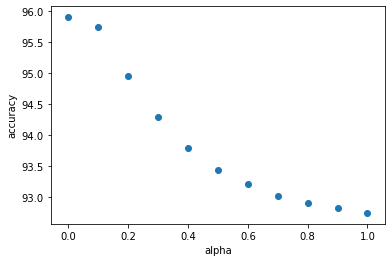

In [73]:
alpha=list(predictions.keys())
prediction=[k*100 for k in list(predictions.values())]

plt.scatter(alpha, prediction)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.show()

[95.95379513901541,
 96.08643369893962,
 95.47935721313267,
 94.91163502532523,
 94.39784280144299,
 93.97150457311518,
 93.62241737419377,
 93.38264766971541,
 93.20846846190285,
 93.07510111868235,
 92.96505484094305]